In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

WHO created a dataset of the health status of all countries over time and includes statistics on life expectancy, adult mortality,
and more. Using this dataset, explore the relationships between various variables. 
Dataset link :https://www.kaggle.com/kumarajarshi/life-expectancy-who

Here are some questions that can be addressed : 
- What are the predicting variables actually affecting the life expectancy the most?
- How do Infant and Adult mortality rates affect life expectancy?
- Does Life Expectancy have a positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol, etc.
- What is the impact of schooling on the lifespan of humans?
- Does Life Expectancy have a positive or negative relationship with drinking alcohol?
- Do densely populated countries tend to have a lower life expectancy?
- What is the impact of Immunization coverage on life Expectancy? More immunization category 

#### Load the data and handle missing values

In [2]:
df=pd.read_csv('expectancy.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
#handle the nas. ffil will be the most accurate thing to reduce cutting off data and skeweness. It makes sense to fill in 
# the value to the closest one in the dataset
df = df.ffill(axis = 0) 

### Distributions of the features - numerical and categorical

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
numerical = df.columns

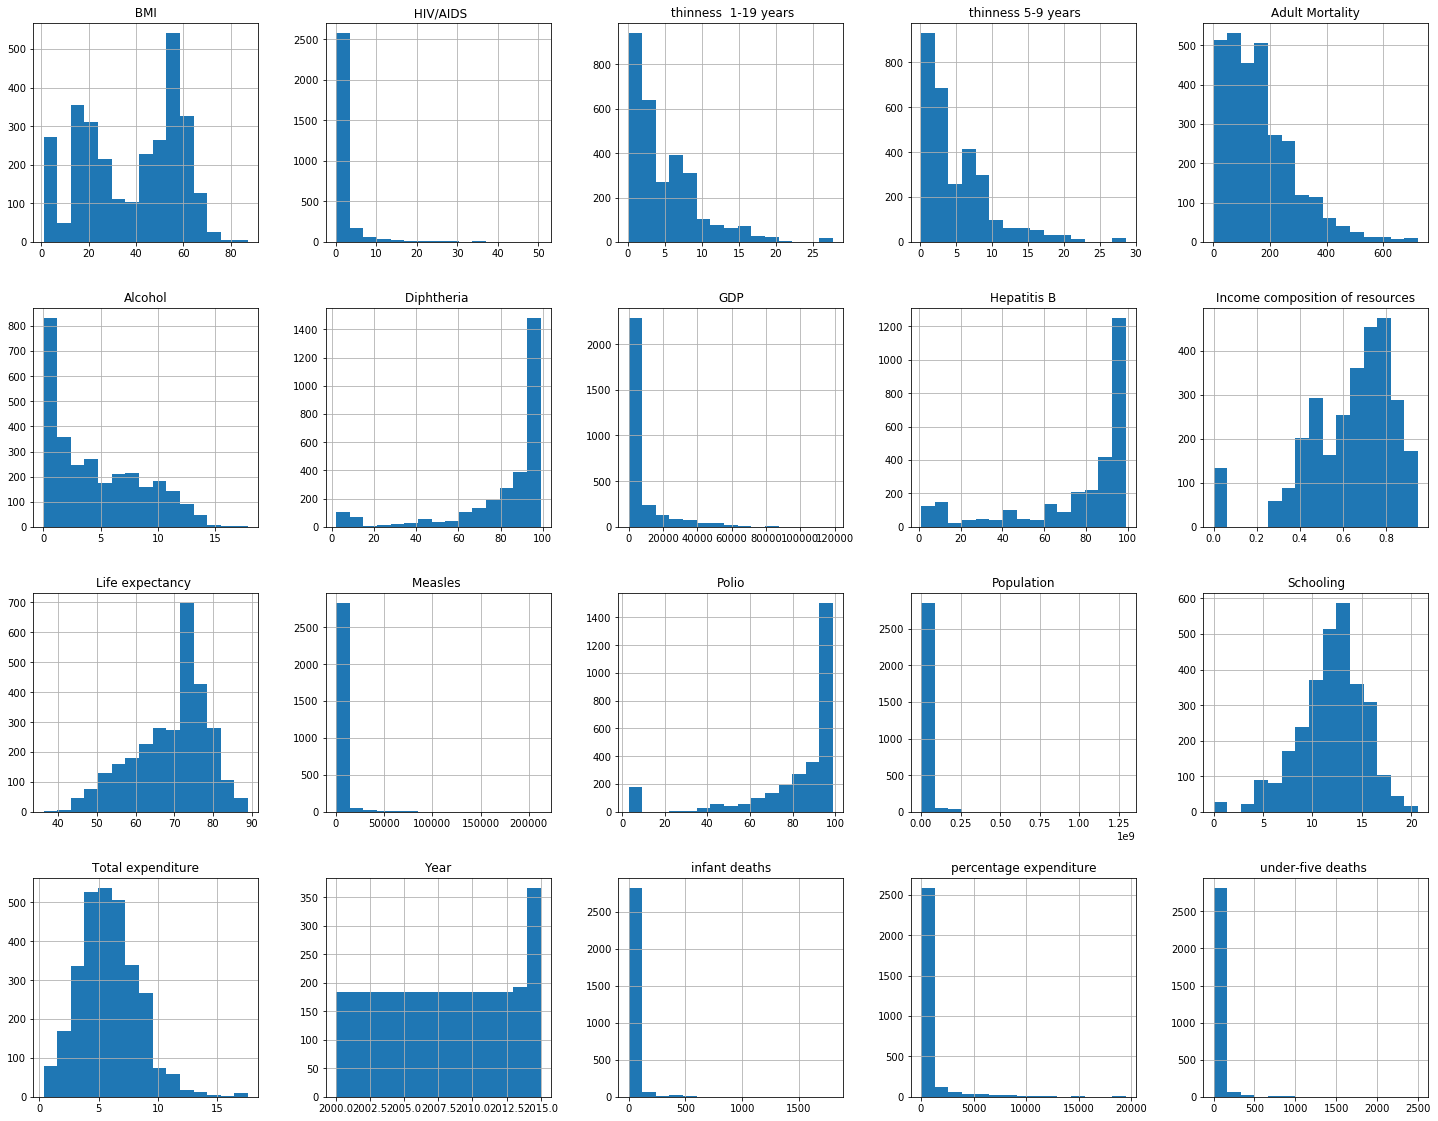

In [7]:
df[numerical].hist(bins=15, figsize=(25, 25), layout=(5, 5));

In [8]:
categorical = [
  'Year', 'Status'
]


In [9]:
df.columns = [c.replace(' ', '_') for c in df.columns]


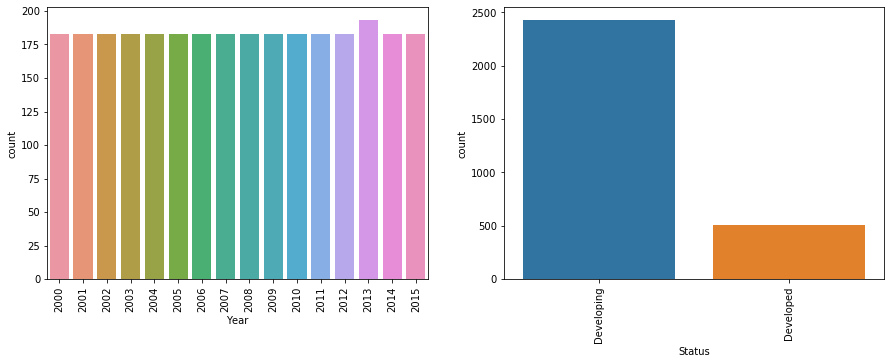

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Life expectancy visualization map

In [13]:
import folium
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

In [14]:
df1 = df.loc[df['Year'] == 2015]

In [15]:
import wget 
# download countries geojson file
#!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
world_geo = wget.download( 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json')    
print('GeoJSON file downloaded!')

100% [............................................................................] 252515 / 252515GeoJSON file downloaded!


In [16]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df1,
    columns=['Country', 'Life_expectancy_'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Age Expectancy for 2015'
)

# display map
world_map

### Feature engineering and correlation maps

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in df:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [18]:
df['avg_immunization'] = (df['Hepatitis_B'] + df['Polio'] + df['Diphtheria_'])/3

### Correlation matrix

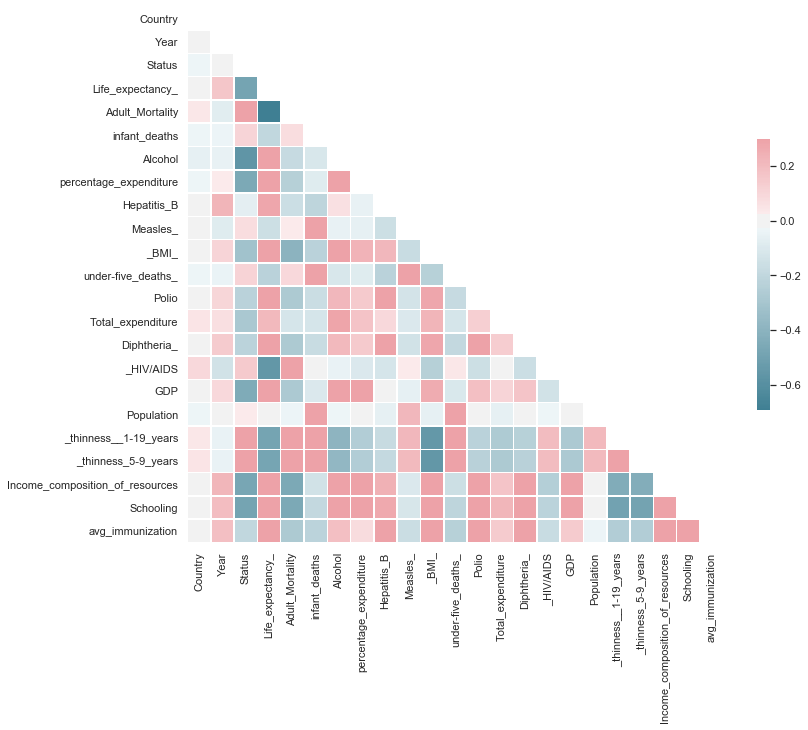

In [19]:
from string import ascii_letters


sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Correlation with the response variable

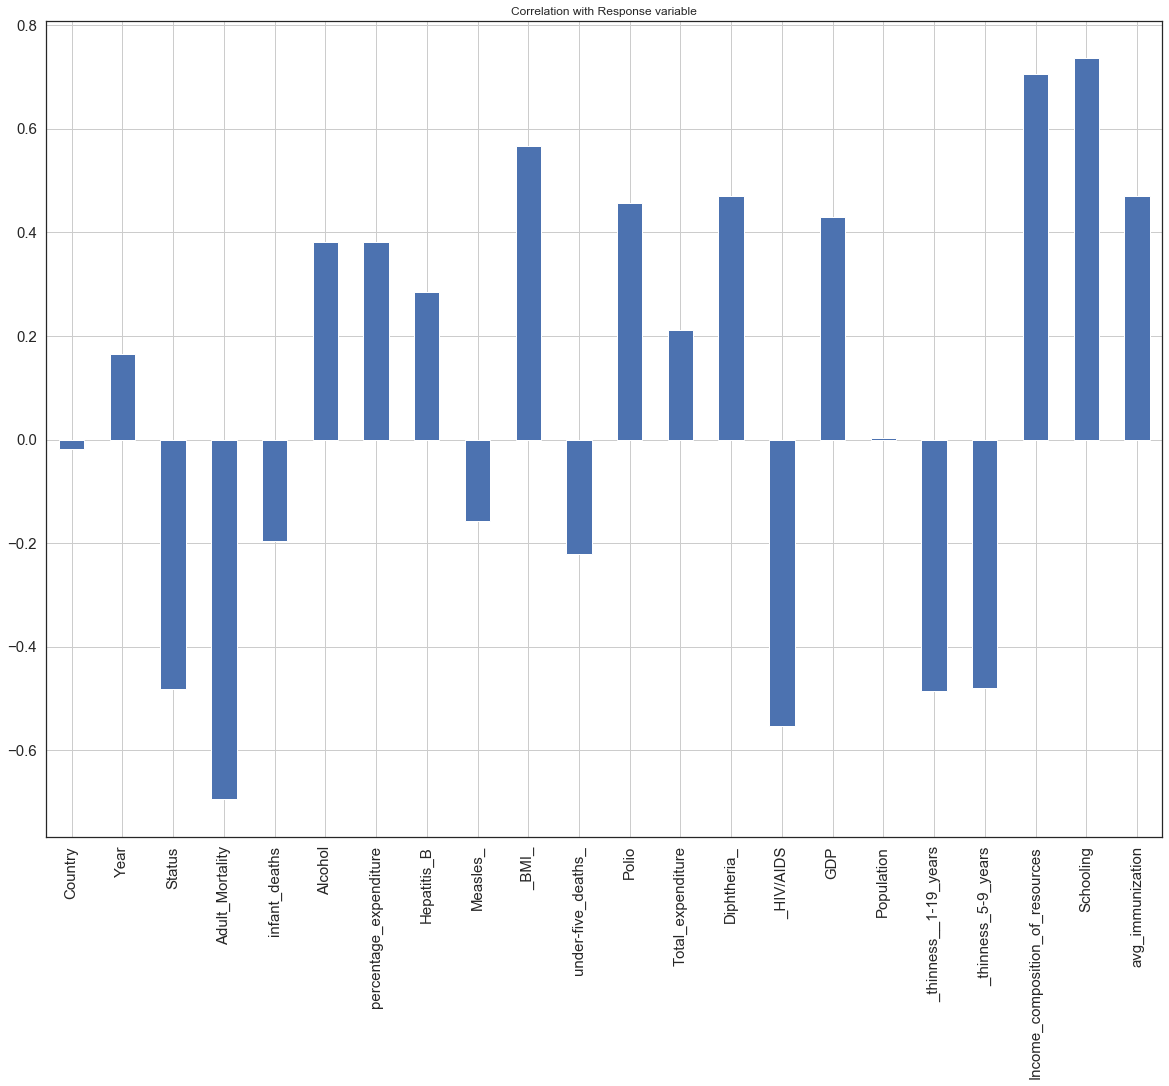

In [20]:
df.drop(columns = ['Life_expectancy_']
    ).corrwith(df.Life_expectancy_).plot.bar(figsize=(20,15),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 90,
              grid = True)

In [21]:
df.describe()

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,...,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling,avg_immunization
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,95.096324,2007.518720,0.825732,69.195643,164.816542,30.303948,4.607270,738.251295,75.683799,2419.592240,...,5.905211,82.075221,1.742103,7475.593613,1.316870e+07,4.955956,5.002553,0.631418,11.935671,80.022237
std,56.244904,4.613841,0.379405,9.536654,124.433748,117.926501,4.044785,1987.914858,28.851806,11467.272489,...,2.484620,23.917022,5.077785,13728.461983,5.629984e+07,4.541403,4.670154,0.210920,3.340202,21.470532
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,2.666667
25%,46.000000,2004.000000,1.000000,63.025000,74.000000,0.000000,0.880000,4.685343,66.000000,0.000000,...,4.260000,78.000000,0.100000,456.766527,1.364255e+05,1.600000,1.600000,0.494000,10.100000,67.666667
50%,93.000000,2008.000000,1.000000,72.000000,144.000000,3.000000,3.765000,64.912906,89.000000,17.000000,...,5.710000,93.000000,0.100000,1680.834893,1.289898e+06,3.400000,3.400000,0.684000,12.300000,90.000000
75%,145.000000,2012.000000,1.000000,75.600000,228.000000,22.000000,7.665000,441.534144,96.000000,360.250000,...,7.440000,97.000000,0.800000,6454.061607,7.394106e+06,7.300000,7.300000,0.791000,14.100000,96.000000
max,192.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,...,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,99.000000


In [22]:
df.drop(['_thinness__1-19_years', '_thinness_5-9_years','Country','Hepatitis_B','Polio','Diphtheria_'], axis = 1, inplace=True) 

### Feature scaling and train - test

In [23]:
y = df['Life_expectancy_'].values

In [24]:
df2 = df.drop(['Life_expectancy_'], axis = 1) 

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 16 columns):
Year                               2938 non-null int64
Status                             2938 non-null int32
Adult_Mortality                    2938 non-null float64
infant_deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage_expenditure             2938 non-null float64
Measles_                           2938 non-null int64
_BMI_                              2938 non-null float64
under-five_deaths_                 2938 non-null int64
Total_expenditure                  2938 non-null float64
_HIV/AIDS                          2938 non-null float64
GDP                                2938 non-null float64
Population                         2938 non-null float64
Income_composition_of_resources    2938 non-null float64
Schooling                          2938 non-null float64
avg_immunization                   2938 non-null

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in df2:
    if df2[col].dtypes=='object':
        df2[col]=le.fit_transform(df2[col])

In [26]:
#from sklearn.preprocessing import StandardScaler


#Feature Scaling
from sklearn.preprocessing import StandardScaler

X = df2
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

### First model : Random forest

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [29]:
y_predRF = RF.predict(X_test)

In [30]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predRF))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predRF))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predRF)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predRF))
print('R squared', metrics.r2_score(y_test,y_predRF))

Mean Absolute Error:  1.178605442176871
Mean Squared Error:  3.1374408163265306
Root Mean Squared Error:  1.7712822520215492
Explained Variance Score:  0.963940382182791
R squared 0.9638112294356214


Feature ranking:
1. feature 10 (0.582471)
2. feature 13 (0.171502)
3. feature 2 (0.130897)
4. feature 7 (0.045070)
5. feature 4 (0.010415)
6. feature 14 (0.008867)
7. feature 0 (0.008338)
8. feature 3 (0.008159)
9. feature 9 (0.007801)
10. feature 8 (0.007312)
11. feature 11 (0.004525)
12. feature 15 (0.003902)
13. feature 5 (0.003578)
14. feature 12 (0.003248)
15. feature 6 (0.003199)
16. feature 1 (0.000718)


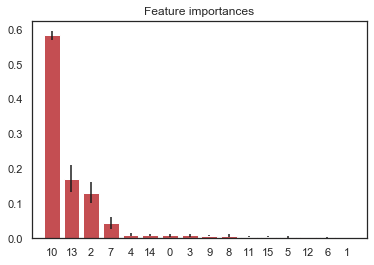

In [31]:
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Second model : XG boost

In [32]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)
eval_set = [(X_train,y_train), (X_test,y_test)]
xg_reg.fit(X_train,y_train,early_stopping_rounds=45, eval_metric=["rmse"], eval_set=eval_set, verbose=True )

[0]	validation_0-rmse:48.72676	validation_1-rmse:48.56179
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 45 rounds.
[1]	validation_0-rmse:34.23642	validation_1-rmse:34.09910
[2]	validation_0-rmse:24.09939	validation_1-rmse:23.96776
[3]	validation_0-rmse:17.01269	validation_1-rmse:16.90311
[4]	validation_0-rmse:12.06804	validation_1-rmse:11.96117
[5]	validation_0-rmse:8.62693	validation_1-rmse:8.53379
[6]	validation_0-rmse:6.24148	validation_1-rmse:6.17217
[7]	validation_0-rmse:4.62391	validation_1-rmse:4.59436
[8]	validation_0-rmse:3.52183	validation_1-rmse:3.53882
[9]	validation_0-rmse:2.78724	validation_1-rmse:2.86936
[10]	validation_0-rmse:2.31026	validation_1-rmse:2.46421
[11]	validation_0-rmse:2.00789	validation_1-rmse:2.22276
[12]	validation_0-rmse:1.79869	validation_1-rmse:2.07910
[13]	validation_0-rmse:1.64485	validation_1-rmse:2.00227
[14]	validation_0-rmse:1.56371	validation_1

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [33]:
y_predXGB = xg_reg.predict(X_test)
predictions = [round(value) for value in y_predXGB]

In [34]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predXGB))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predXGB))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predXGB)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predXGB))
print('R squared', metrics.r2_score(y_test,y_predXGB))

Mean Absolute Error:  1.201667240687779
Mean Squared Error:  3.1528362131762204
Root Mean Squared Error:  1.775622767700454
Explained Variance Score:  0.9638951986007009
R squared 0.9636336514295466


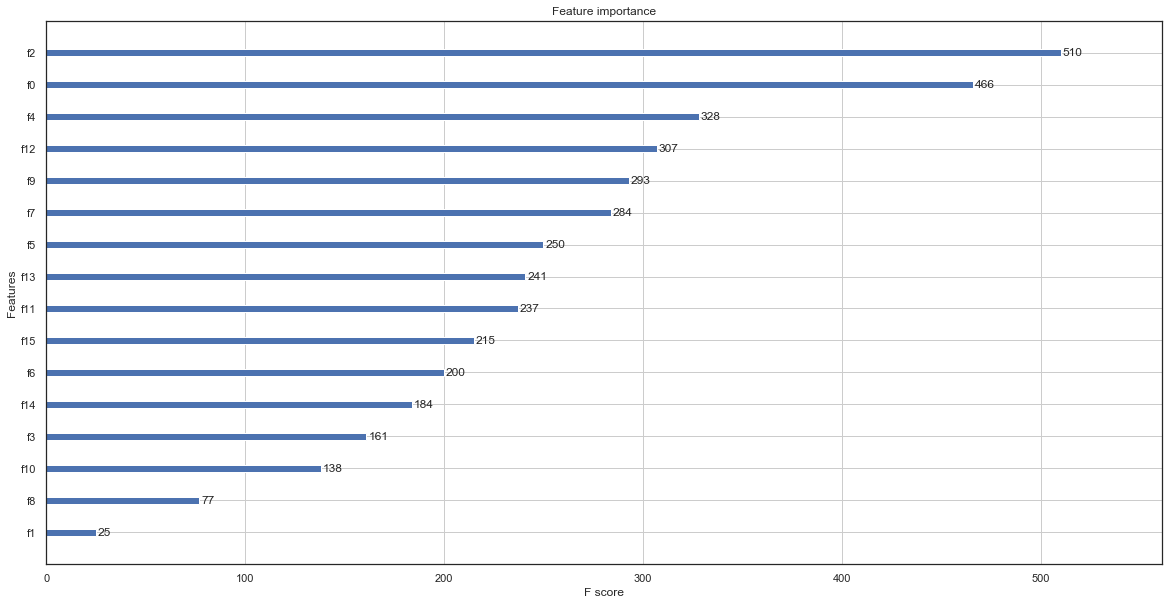

In [44]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

### Figure out the features with highest p values and the regression coefficient

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regressor = LinearRegression()

In [38]:
from sklearn.model_selection import train_test_split

X_train1,X_test1,y_train1,y_test1=train_test_split(df2.values,y,test_size=0.2,random_state=42)

In [39]:
regressor.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
ypredd = regressor.predict(X_test1)

In [41]:
print('R squared', metrics.r2_score(y_test,ypredd))

R squared 0.8324147562010895


In [42]:
import statsmodels.api as sm
est = sm.OLS(y_train1,X_train1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.143e+04
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:11:35   Log-Likelihood:                         -6673.4
No. Observations:                2350   AIC:                                  1.338e+04
Df Residuals:                    2334   BIC:                                  1.347e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0282      0.000     83.304      0.000       0.028       0.029
x2            -1.7221      0.304     -5.656      0.000      -2.319      -1.125
x3            -0.0201      0.001    -22.184      0.000      -0.022      -0.018
x4             0.0999      0.010     10.428      0.000       0.081       0.119
x5             0.0719      0.028      2.609      0.009       0.018       0.126
x6             0.0002   8.53e-05      2.903      0.004    8.04e-05       0.000
x7         -2.698e-05   8.69e-06     -3.106      0.002    -4.4e-05   -9.94e-06
x8             0.0415      0.005      7.804      0.000       0.031       0.052
x9            -0.0752      0.007    -10.673      0.000      -0.089      -0.061
x10            0.0343      0.037      0.923      0.356      -0.039       0.107
x11           -0.4656      0.019    -24.152      0.000      -0.503      -0.428
x12         1.271e-05   1.24e-05      1.026      0.305   -1.16e-05     3.7e-05
x13          3.66e-10   1.91e-09      0.192      0.848   -3.38e-09    4.11e-09
x14            6.8758      0.728      9.448      0.000       5.449       8.303
x15            0.6806      0.048     14.241      0.000       0.587       0.774
x16            0.0440      0.005      9.507      0.000       0.035       0.053
==============================================================================
Omnibus:                      161.313   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.659
Skew:                          -0.237   Prob(JB):                    9.18e-134
Kurtosis:                       5.456   Cond. No.                     4.49e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Final answers to the beginning questions


- What are the predicting variables actually affecting the life expectancy the most? Immunization, Disease rate , Schooling, the country status, and adult/ infant mortality
- How do Infant and Adult mortality rates affect life expectancy? The higher they are, the lower the life expectancy is 
- Does Life Expectancy have a positive or negative correlation with BMI and drinking - they are positevely correlated. Correlation does not means causation! That happens because low BMi and no alchol are often appearing in poor countries where people starve, causing the life expectancy to be lower.
- What is the impact of schooling on the lifespan of humans? It increases life expectancy
- Do densely populated countries tend to have a lower life expectancy? It seems to have a slightly positive impact
- What is the impact of Immunization coverage on life Expectancy? The higher the immunization, the higher the life expectancy is